In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''
   This Module is the implementation
   of sequential data prediction. 
   It predicts the future sales using 
   LSTM and LSTM-CNN combo techniques
'''

# Ownership
__author__ = ["M. Haseeb Hassan"]
__copyright__ = ["Copyrights @ hacceebhassan"]
__license__ = "MIT"
__version__ = "1.0.1"
__maintainer__ = "M. Haseeb Hassan"
__email__ = "hacceebhassan@gmail.com"
__status__ = "Development"


### Importing Packages

In [111]:
import pandas as pd
import re
from itertools import combinations
from itertools import permutations
import numpy as np
from numpy import array

### Loading Data

In [112]:
# Load the data
data = pd.read_csv('data/data.csv', header = None)
df = data.copy()

### Data Cleaning and Modeling

In [113]:
df = df.replace({'\[':''}, regex=True)
df = df.replace({']':''}, regex=True)
df = df.fillna(0)

In [114]:
df = df[df.iloc[:,1]  != 0]
df = df[df.iloc[:,2]  != 0]
df = df.astype(int)

In [115]:
a = 0
X = []
Y = []
for row in df.itertuples(index = False): 
  #print(row)
  for i in range(len(row) - 2):
    res1 = [row[i], row[i + 1]]
    res2 = [row[i + 2]]
    if any(x == 0 for x in res1) or any(x == 0 for x in res2) :
      continue
    else:
      X.append(res1)
      Y.append(res2)


In [116]:
df_final = pd.DataFrame(zip(X, Y), columns = ['Input Features', 'Output'])
df_final

,Input Features,Output
0,"[46, 76]",[33]
1,"[76, 33]",[66]
2,"[33, 66]",[76]
3,"[46, 76]",[76]
4,"[76, 76]",[36]
...,...,...
4765,"[96, 93]",[93]
4766,"[93, 93]",[56]
4767,"[93, 56]",[95]
4768,"[56, 95]",[96]


### Model_1

In [120]:
# Importing Model
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
import matplotlib.pyplot as plt

In [121]:
# Changing input adn output features into numpy arrays
X = np.array(X)
X = X.reshape(4770, 2, 1)
Y = np.array(Y)

In [122]:
# Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(2, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics = ['acc'])

# Runnnn
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
120/120 [==============================] - 1s 9ms/step - loss: 2669.9751 - acc: 0.0000e+00 - val_loss: 1658.5454 - val_acc: 0.0000e+00
Epoch 2/1000
120/120 [==============================] - 1s 7ms/step - loss: 1220.2070 - acc: 0.0000e+00 - val_loss: 1450.5854 - val_acc: 0.0000e+00
Epoch 3/1000
120/120 [==============================] - 1s 7ms/step - loss: 1083.3364 - acc: 0.0000e+00 - val_loss: 1314.1854 - val_acc: 0.0000e+00
Epoch 4/1000
120/120 [==============================] - 1s 7ms/step - loss: 1042.0134 - acc: 0.0000e+00 - val_loss: 1258.9210 - val_acc: 0.0000e+00
Epoch 5/1000
120/120 [==============================] - 1s 7ms/step - loss: 1012.3126 - acc: 0.0000e+00 - val_loss: 1225.2761 - val_acc: 0.0000e+00
Epoch 6/1000
120/120 [==============================] - 1s 7ms/step - loss: 990.1863 - acc: 0.0000e+00 - val_loss: 1197.8544 - val_acc: 0.0000e+00
Epoch 7/1000
120/120 [==============================] - 1s 7ms/step - loss: 979.8709 - acc: 0.0000e+00 - val_loss

#### Prediction

In [123]:
# Values to Check
# 11, 16 = 72
# 93, 72 = 93
test_input = array([93, 72])
test_input = test_input.reshape((1, 2, 1))
test_output = model.predict(test_input, verbose=0)
print(int(test_output))

82


### Model_2

In [125]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics = ['acc'])

history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
120/120 [==============================] - 3s 23ms/step - loss: 2431.4165 - acc: 0.0000e+00 - val_loss: 1352.9689 - val_acc: 0.0000e+00
Epoch 2/1000
120/120 [==============================] - 2s 19ms/step - loss: 1103.4368 - acc: 0.0000e+00 - val_loss: 1424.4325 - val_acc: 0.0000e+00
Epoch 3/1000
120/120 [==============================] - 2s 18ms/step - loss: 1026.2944 - acc: 0.0000e+00 - val_loss: 1245.8186 - val_acc: 0.0000e+00
Epoch 4/1000
120/120 [==============================] - 2s 19ms/step - loss: 975.2474 - acc: 0.0000e+00 - val_loss: 1238.2592 - val_acc: 0.0000e+00
Epoch 5/1000
120/120 [==============================] - 2s 18ms/step - loss: 1004.2538 - acc: 0.0000e+00 - val_loss: 1243.3110 - val_acc: 0.0000e+00
Epoch 6/1000
120/120 [==============================] - 2s 19ms/step - loss: 961.5196 - acc: 0.0000e+00 - val_loss: 1440.5043 - val_acc: 0.0000e+00
Epoch 7/1000
120/120 [==============================] - 2s 19ms/step - loss: 960.6623 - acc: 0.0000e+00 - va

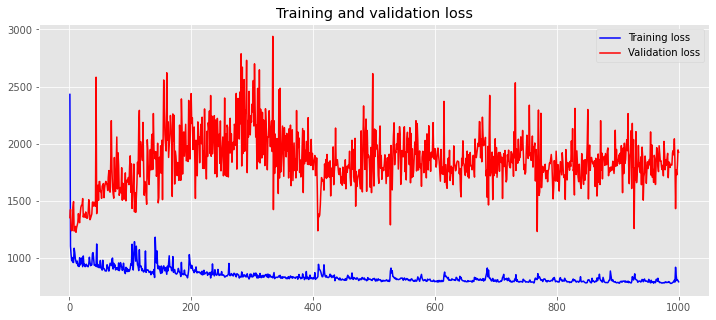

In [126]:
# Checking Plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

#### Prediction

In [127]:
# Values to Check
# 11, 16 = 72
# 93, 72 = 93
test_input = array([11, 16])
test_input = test_input.reshape((1, 2, 1))
test_output = model.predict(test_input, verbose=0)
print(int(test_output))

69
